# 계층적 클러스터링
1. 하나의 데이터 샘플 = 하나의 클러스터
1. 유사도가 높은 클러스터끼리 합쳐서 갯수를 줄임

## 클러스터간 거리 측정

### 비귀납적 방법

- centroid : 클러스터의 중심점 정의 후, 중심점 간의 거리를 클러스터 간 거리로 정의

- single : 클러스터 내의 모든 데이터 조합에 대해 거리를 측정, 최소 값 채택 (Nearest Point)

- complete : same with single but, pick the max value. (Farthest Point Algorithm)

- average : same but pick the average of values

### 귀납적 방법
agglomerative clustering에서 사용 가능 (계산량 감소)

- median : 클러스터 u가 클러스터 s, t 가 결합하여 생겼다면, 원래 클러스터 중심점의 평균을 사용


- weighted : 클러스터 u가 클러스터 s, t 가 결합하여 생겼다면, 원래 클러스터까지의 두 거리의 평균을 사용

$$d(u,v) = (dist(s,v) + dist(t,v))/2$$

- Ward : 클러스터 u가 클러스터 s, t 가 결합하여 생겼다면, 두 클러스터 거리의 가중 평균에서 원 클러스터 사이의 거리를 보정한 값 사용

$$d(u,v) = \sqrt{\frac{|v|+|s|}{|v|+|s|+|t|}d(v,s)^2 + \frac{|v|+|t|}{|v|+|s|+|t|}d(v,t)^2 - \frac{|v|}{|v|+|s|+|t|}d(s,t)^2}$$

Scipy에 구현이 되어있다.

(150, 2)


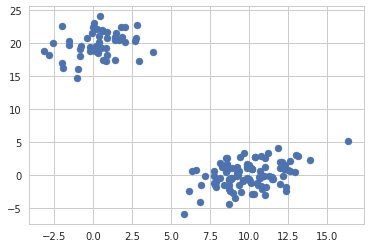

In [2]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
np.set_printoptions(precision=5, suppress=True) 

np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)

plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [3]:
Z = linkage(X, 'ward')

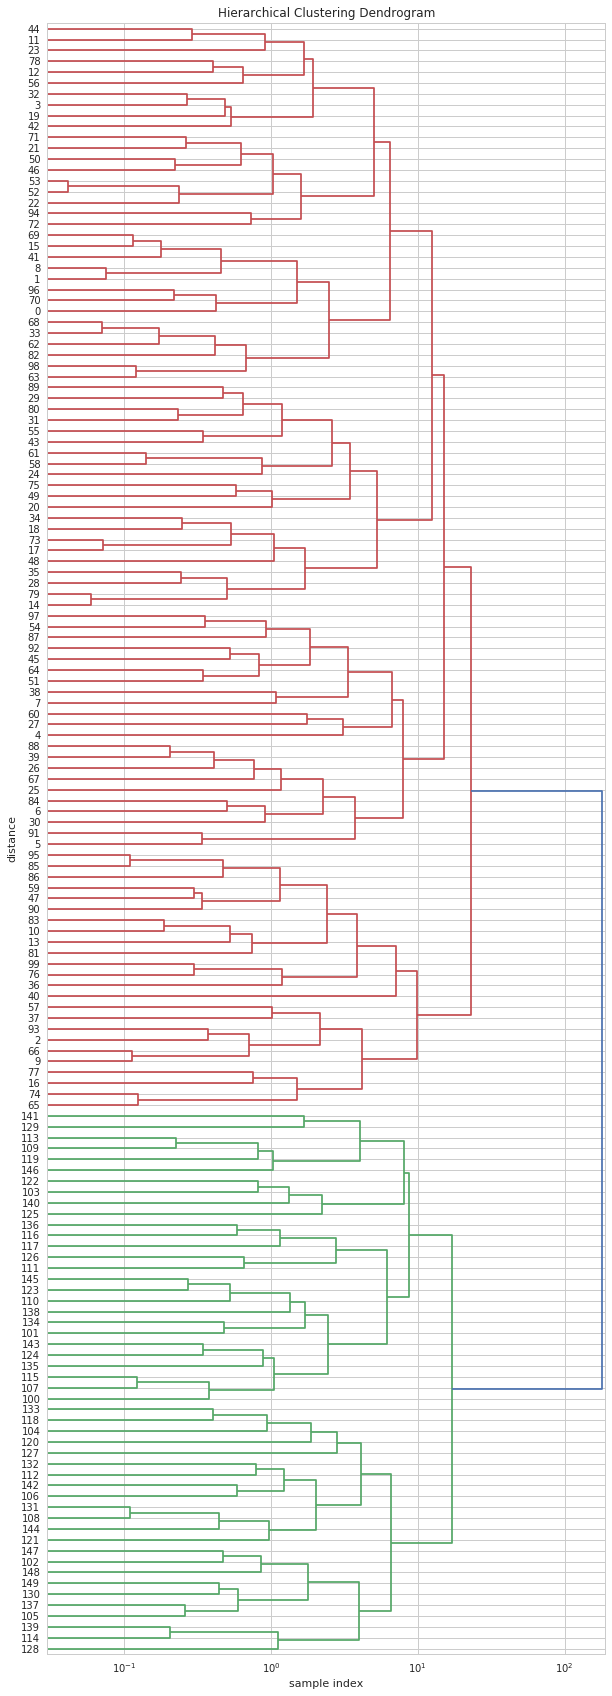

In [4]:
mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.figure(figsize=(10,30))
ax = plt.subplot(111)
dendrogram(Z, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ax.set_xlim(xmin=0.03)
ax.set_xscale('log')
plt.show()